<h1>Authors</h1>

Here I am going to do some analysis of the Beatles songs authorship. Only official authorship data is analyzed, i.e., all non-cover songs belong to Lennon-McCartney, Harrison, or Starkey. Sure, the lion share of the Beatles songs is attributed to Lennon-McCartney. But perhaps, there is some interesting information behind it to reveal.

Let's look at the share of songs by authors first. What is the share of covers?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

# load data
df = pd.read_json('data.json')

# configure graphics 
plt.style.use('ggplot')
plt.figure()
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')

<Figure size 432x288 with 0 Axes>

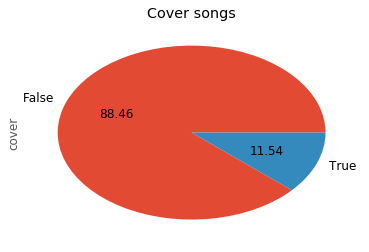

In [2]:
pd.value_counts(df['cover'], sort=True).plot.pie(title='Cover songs', autopct='%.2f', fontsize=12)

About 88% are original songs. Let's analyze them.

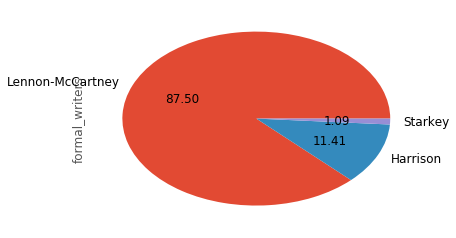

In [3]:
dfnc = df[df.cover==False]

pd.value_counts(dfnc['formal_writers'], sort=True).plot.pie(autopct='%.2f', fontsize=12)

87% by Lennon-McCartney, about 12% by Harrison. Poor Ringo has only 1%. But that's rather obvious. What's the time dynamics?

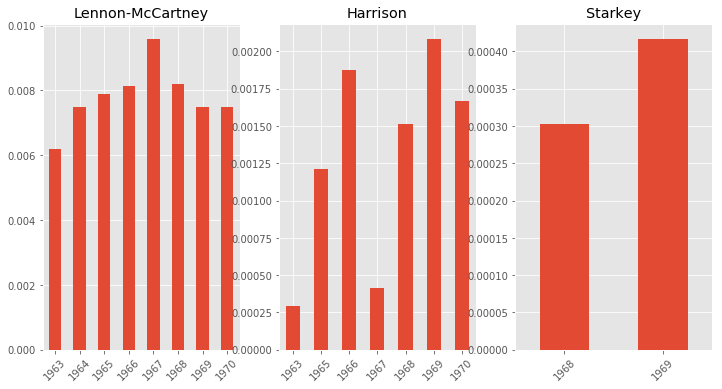

In [4]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)

for ax, singer in zip(axs.flatten(), ('Lennon-McCartney', 'Harrison', 'Starkey')):

    gr = dfnc[dfnc['formal_writers']==singer].groupby('year')
    writers_list = []

    for key in gr.groups.keys():
        year = gr.get_group(key)['year'].values[0]
        
        songs_by_author = gr.get_group(key)['formal_writers'].value_counts().sum()
        songs_by_all = df[df['year']==gr.get_group(key)['year'].values[0]]['formal_writers'].count() * 100
        
        writers = songs_by_author / songs_by_all
        writers_list.append({'year': year, 'writers': writers})

    writers_df = pd.DataFrame(index=[k['year'] for k in writers_list], data={'writers': [k['writers'] for k in writers_list]})
    writers_df.sort_index()['writers'].plot(kind='bar', ax=ax, title=singer, rot=45)

The share of Lennon-McCartney's songs is gradually rising to the maximum of about 90% in 1967, and then is falling down a bit. Harrison's share is different from year to year. Ringo contributed in two years only.

But we include covers in the stats. But what if we don't?

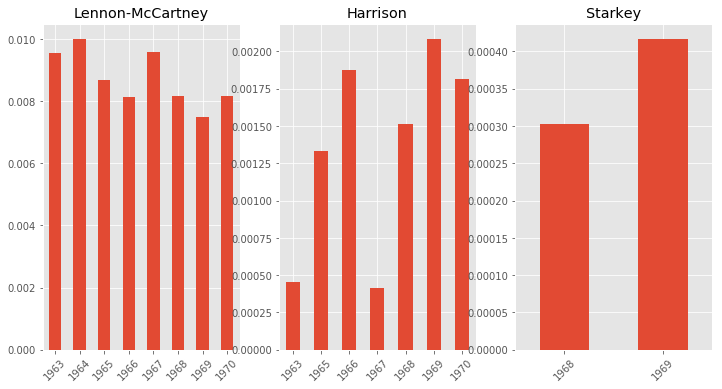

In [5]:
fig, axs = plt.subplots(figsize=(12, 6), nrows=1, ncols=3)

for ax, singer in zip(axs.flatten(), ('Lennon-McCartney', 'Harrison', 'Starkey')):

    gr = dfnc[dfnc['formal_writers']==singer].groupby('year')
    writers_list = []

    for key in gr.groups.keys():
        year = gr.get_group(key)['year'].values[0]
        
        songs_by_author = gr.get_group(key)['formal_writers'].value_counts().sum()
        songs_by_all = dfnc[dfnc['year']==gr.get_group(key)['year'].values[0]]['formal_writers'].count() * 100
        
        writers =  songs_by_author / songs_by_all
        writers_list.append({'year': year, 'writers': writers})

    writers_df = pd.DataFrame(index=[k['year'] for k in writers_list], data={'writers': [k['writers'] for k in writers_list]})
    writers_df.sort_index()['writers'].plot(kind='bar', ax=ax, title=singer, rot=45)

We see that the share of Lennon-McCartney's songs is actually slightly falling with time, while Harrison's one is generaly rising.

Let's look at authorship against vocals, length, number of words in lyrics and number of words in titles.

So, how many of songs sung by each musician were written by them?

In [6]:
# number of songs sung by Lennon / number of songs by Lennon-McCartney
dfnc[dfnc.vocals=='Lennon'].count()[0] / dfnc[dfnc.formal_writers=='Lennon-McCartney'].count()[0] * 100

32.919254658385093

In [7]:
# number of songs sung by McCartney / number of songs by Lennon-McCartney 
dfnc[dfnc.vocals=='McCartney'].count()[0] / dfnc[dfnc.formal_writers=='Lennon-McCartney'].count()[0] * 100

31.677018633540371

So Lennon and McCartney as solo singers sang about the same amount of the songs they wrote, about a third each. Other songs they wrote were sung by other Beatles members or in cooperation with them. But what about Harrison?

In [8]:
# number of songs sung by Harrison / number of songs by Harrison
dfnc[dfnc.vocals=='Harrison'].count()[0] / dfnc[dfnc.formal_writers=='Harrison'].count()[0] * 100

104.76190476190477

Harrison sings more than 100% of songs he wrote! How can it be? Actually, Harrison sang several songs by Lennon-McCartney (while they didn't sing songs by Harrison or Starr). Which are they?

In [9]:
# original songs sung by Harrison but not written by him
dfnc[(dfnc.vocals=='Harrison') & (dfnc.formal_writers!='Harrison')][['title', 'formal_writers']]

,title,formal_writers
170,I'm Happy Just To Dance With You,Lennon-McCartney
204,Do You Want To Know A Secret,Lennon-McCartney


So there are two songs by Lennon-McCartney sung by Harrison alone. 

And what about Ringo?

In [10]:
# original songs sung by Harrison but not written by him
dfnc[(dfnc['vocals']=='Starr') & (dfnc['formal_writers']!='Starkey')][['title', 'formal_writers']]

,title,formal_writers
88,Good Night,Lennon-McCartney
117,Yellow Submarine,Lennon-McCartney
133,What Goes On,Lennon-McCartney
190,I Wanna Be Your Man,Lennon-McCartney


Oh well, Ringo sang four songs written for him by Lennon & Mccartney.

Let's look at lengths then.

In [11]:
# length medians by writers
dfnc.groupby('formal_writers')['length'].median()

formal_writers
Harrison            159
Lennon-McCartney    152
Starkey             197
Name: length, dtype: int64

/home/hrutr/.virtualenvs/tbsa/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


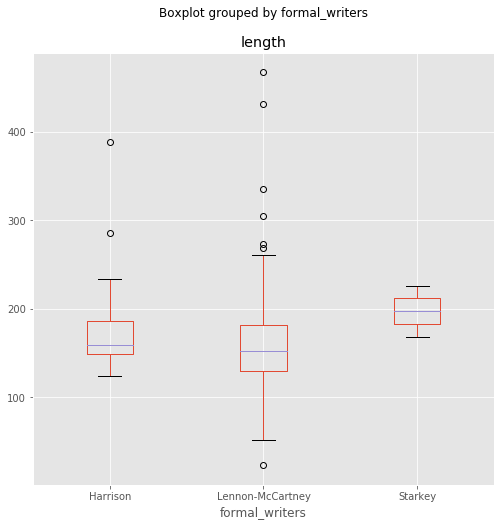

In [12]:
dfnc.boxplot(column='length', by='formal_writers', figsize=(8, 8))

We see that the median lengths are a little different; songs by Starr are the longest, by Lennon-McCartney are the shortest, and by Harrison are in between. Lennon-McCartney songs have the biggest number of outliers and much higher range. 

In [13]:
# number of words in title medians by writers
dfnc.groupby('formal_writers')['num_words_in_title'].median()

formal_writers
Harrison            3
Lennon-McCartney    3
Starkey             3
Name: num_words_in_title, dtype: int64

/home/hrutr/.virtualenvs/tbsa/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


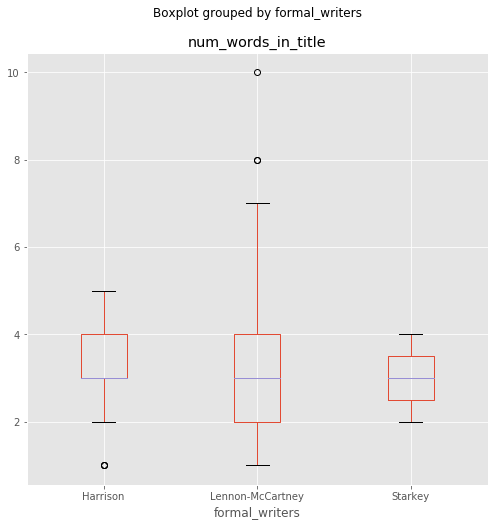

In [14]:
dfnc.boxplot(column='num_words_in_title', by='formal_writers', figsize=(8, 8))

So, songs of all authors have the same median number of words in titles: it's three. But all of them, except Starkey, have many songs that have more.

In [15]:
# number of words in lyrics medians by writers
dfnc.groupby('formal_writers')['num_words_in_lyrics'].median()

formal_writers
Harrison            154
Lennon-McCartney    185
Starkey             203
Name: num_words_in_lyrics, dtype: int64

/home/hrutr/.virtualenvs/tbsa/lib/python3.5/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


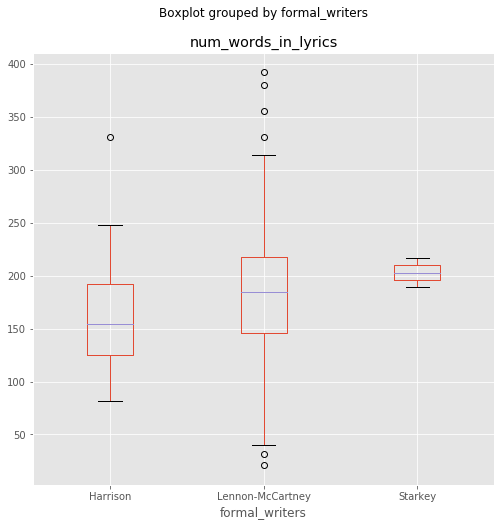

In [16]:
dfnc.boxplot(column='num_words_in_lyrics', by='formal_writers', figsize=(8, 8))

Harrison has the shortest lyrics, Lennon and McCartney go second, and the longest lyrics belong to Ringo's songs. Still the outliers from both sides belong to Lennon-Mccartney.

Finally, let's plot the data in the coordinates of number of words in lyrics and length, just to see with own eyes in what kind Lennon-McCartney's songs are different to Harrison's and Starkey's. It's clearly seen that songs by Harrison and Starr are grouped mostly in the center.

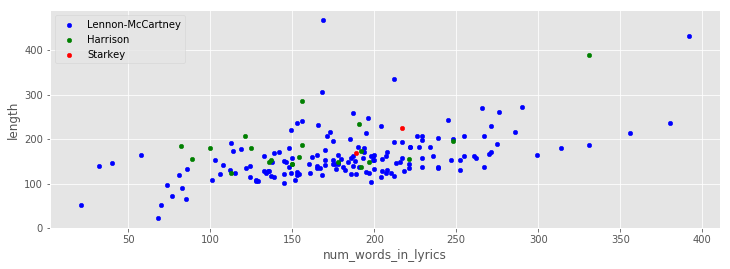

In [17]:
ax = dfnc[dfnc['formal_writers']=='Lennon-McCartney'].plot.scatter(x='num_words_in_lyrics', y='length', 
                                                                figsize=(12, 4), color='Blue', 
                                                                label='Lennon-McCartney')
dfnc[dfnc['formal_writers']=='Harrison'].plot.scatter(x='num_words_in_lyrics', y='length', color='Green', 
                                                   label='Harrison', ax=ax)
dfnc[dfnc['formal_writers']=='Starkey'].plot.scatter(x='num_words_in_lyrics', y='length', color='Red', 
                                                  label='Starkey', ax=ax)

<h3>CONCLUSION</h3>

From all Beatles songs, about 88% are written by the members, and from these about 87% are written by Lennon-McCartney. Harrison has about 12%, Ringo only 1%.

Lennon and McCartney as solo singers sang about the same amount of the songs they wrote together, about a third each. Other songs they wrote were sung by other Beatles members or in cooperation with them. Both Harrison and Starr sang songs by Lennon-McCartney (two and four, respectively), while the opposite never happened.

With time, the share of Lennon-McCartney songs is gradually rising to the maximum of about 90% in 1967, and then is falling down a bit. But if we exclude cover versions, the share of Lennon-McCartney songs is actually slightly falling with time, while Harrison's one is generaly rising.

Median lengths are different only a little; songs by Starr are the longest, by Lennon-McCartney are the shortest, and by Harrison are in between. Songs of all authors have the same median number of words in titles: it's three. But all of them, except Starkey, have many songs that have more. Harrison's songs has the shortest lyrics, Lennon-Mccartney goes second, and the longest lyrics belong to Ringo's songs. Still in all three parameters Lennon-McCartney songs have most number of outliers and higher range.